In [1]:
import pandas as pd
import numpy as np

application_train = pd.read_csv('C:/SHARYU/NEU/Unsupervised_2/Project/Home Credit/application_train.csv/application_train.csv')
application_test = pd.read_csv('C:/SHARYU/NEU/Unsupervised_2/Project/Home Credit/application_test.csv/application_test.csv')
prevapp_df = pd.read_csv('C:/SHARYU/NEU/Unsupervised_2/Project/Home Credit/previous_application.csv/previous_application.csv')

In [2]:
from sklearn import preprocessing
categorical_feats = [
    f for f in application_train.columns if application_train[f].dtype == 'object'
]

for col in categorical_feats:
    lb = preprocessing.LabelEncoder()
    lb.fit(list(application_train[col].values.astype('str')) + list(application_test[col].values.astype('str')))
    application_train[col] = lb.transform(list(application_train[col].values.astype('str')))
    application_test[col] = lb.transform(list(application_test[col].values.astype('str')))

In [3]:
application_train.fillna(-999, inplace = True)


In [4]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
rf.fit(application_train.drop(['SK_ID_CURR', 'TARGET'],axis=1), application_train.TARGET)
features = application_train.drop(['SK_ID_CURR', 'TARGET'],axis=1).columns.values

In [5]:
for name, importance in zip(features, rf.feature_importances_):
    print(name, "=", importance)

NAME_CONTRACT_TYPE = 0.0010606096106813262
CODE_GENDER = 0.013514977295662424
FLAG_OWN_CAR = 0.001368655288659589
FLAG_OWN_REALTY = 0.00021128098029017341
CNT_CHILDREN = 0.000705350165050559
AMT_INCOME_TOTAL = 0.005516141934181211
AMT_CREDIT = 0.009833485679905406
AMT_ANNUITY = 0.013036317019276902
AMT_GOODS_PRICE = 0.010690091367919978
NAME_TYPE_SUITE = 0.0010964333489407077
NAME_INCOME_TYPE = 0.006363348862731258
NAME_EDUCATION_TYPE = 0.01844010404111723
NAME_FAMILY_STATUS = 0.0014889531784139575
NAME_HOUSING_TYPE = 0.0014381562499777064
REGION_POPULATION_RELATIVE = 0.004512996186032358
DAYS_BIRTH = 0.04769414128072249
DAYS_EMPLOYED = 0.02097869140835851
DAYS_REGISTRATION = 0.011025641227141648
DAYS_ID_PUBLISH = 0.014002708099649534
OWN_CAR_AGE = 0.00397513285078541
FLAG_MOBIL = 0.0
FLAG_EMP_PHONE = 0.0024024539875831157
FLAG_WORK_PHONE = 0.000387306796307187
FLAG_CONT_MOBILE = 0.00010225525700721362
FLAG_PHONE = 0.00020052632078242726
FLAG_EMAIL = 0.00029655498723427635
OCCUPATION_T

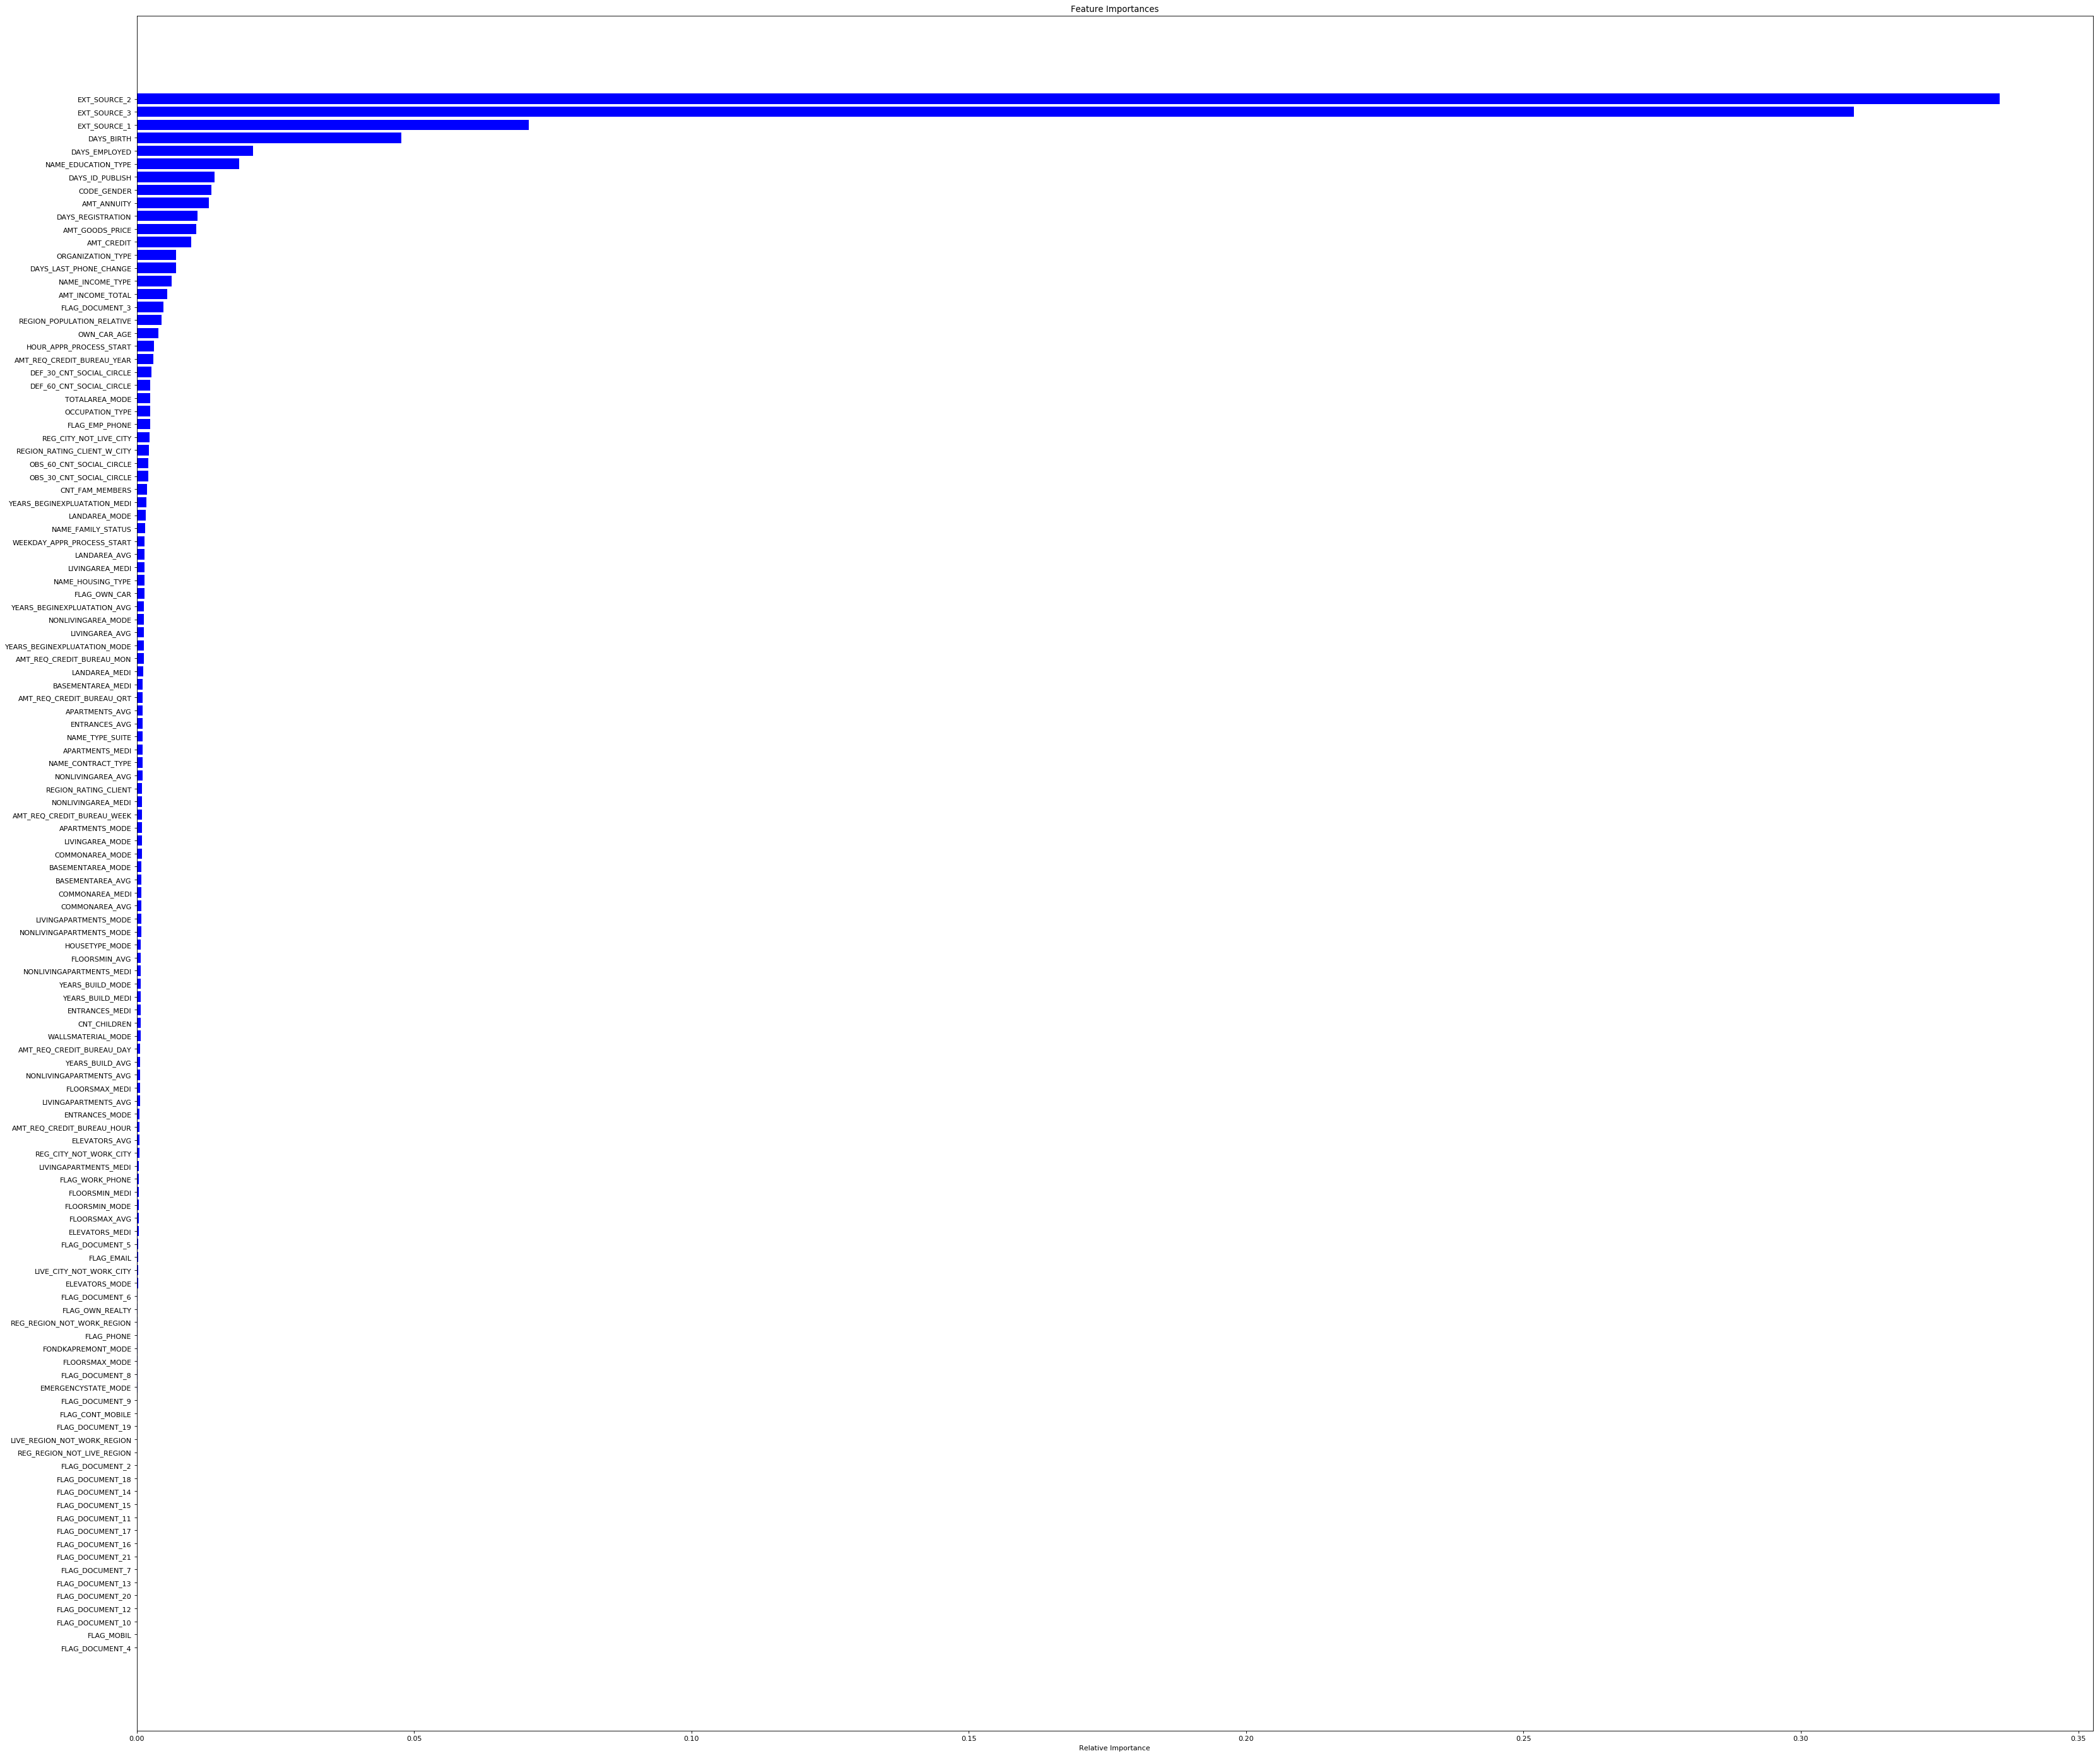

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

importances = rf.feature_importances_
indices = np.argsort(importances)
figure(num=None, figsize=(50, 45), dpi=80, facecolor='w', edgecolor='k')
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()